# Reproducibility

This example assumes you've read `callbacks/basic.ipynb`, and covers:

  - Setting and restoring random seeds at arbitrary frequency for restoring
    from (nearly) any point in training

In [1]:
import deeptrain
deeptrain.append_examples_dir_to_sys_path()

from utils import make_classifier, init_session
from utils import CL_CONFIGS as C
from deeptrain.callbacks import RandomSeedSetter

In [2]:
%config InlineBackend.figure_format = 'retina'  # greatly improve display quality

## Random seed setter
Sets new random seeds (`random`, `numpy`, TF-graph, TF-global) every epoch, incrementing by 1 from start value (default 0).

  - Since `tg.save()` is called each epoch, we specify `freq` via `'save'` instead of `'train:epoch'`.
  - Setting `'load': 1` makes the setter retrieve the loaded seed values (upon `tg.load()`) and set seeds accordingly.

In [3]:
seed_freq = {'save': 1, 'load': 1}
seed_setter = RandomSeedSetter(freq=seed_freq)

## Configure & train

In [4]:
C['traingen']['callbacks'] = [seed_setter]
C['traingen']['epochs'] = 3
C['traingen']['iter_verbosity'] = 0
tg = init_session(C, make_classifier)

Discovered 48 files with matching format
Discovered dataset with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Preloading superbatch ... Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
Logging ON; directory (new): C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\logs\M32__model-Adam__min999.000



Data set_nums shuffled


_____________________
 EPOCH 1 -- COMPLETE 



Validating...
RANDOM SEEDS RESET (random: 1, numpy: 1, tf-graph: 1, tf-global: 1)
TrainGenerator state saved
Model report generated and saved
Best model saved to C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models\M32__model-Adam__min1.128
RANDOM SEEDS RESET (random: 2, numpy: 2, tf-graph: 2, tf-global: 2)
TrainGenerator state saved
Model report generated and saved


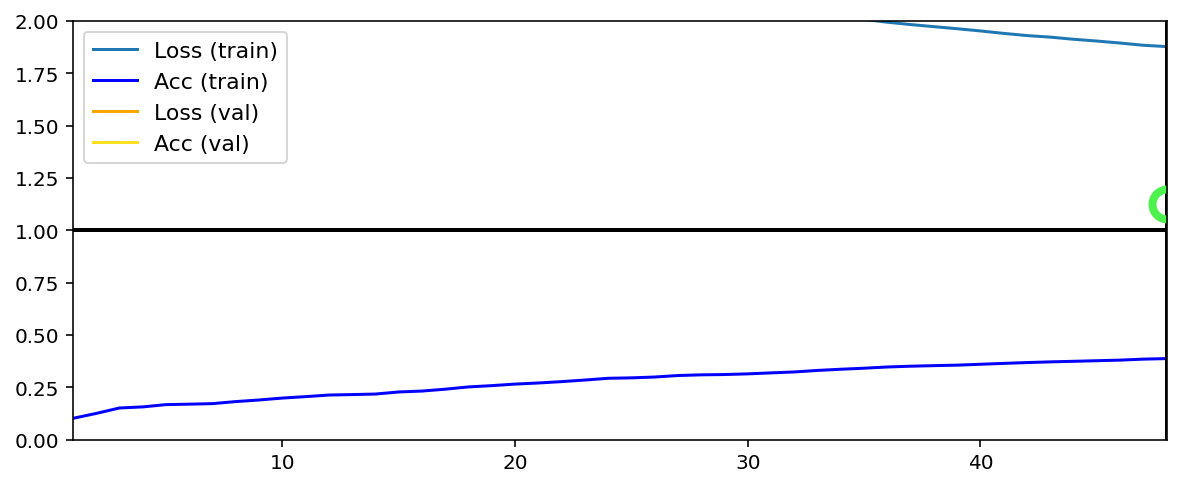


Data set_nums shuffled


_____________________
 EPOCH 2 -- COMPLETE 



Validating...
RANDOM SEEDS RESET (random: 3, numpy: 3, tf-graph: 3, tf-global: 3)
TrainGenerator state saved
Model report generated and saved
Best model saved to C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models\M32__model-Adam__min.620
RANDOM SEEDS RESET (random: 4, numpy: 4, tf-graph: 4, tf-global: 4)
TrainGenerator state saved
Model report generated and saved


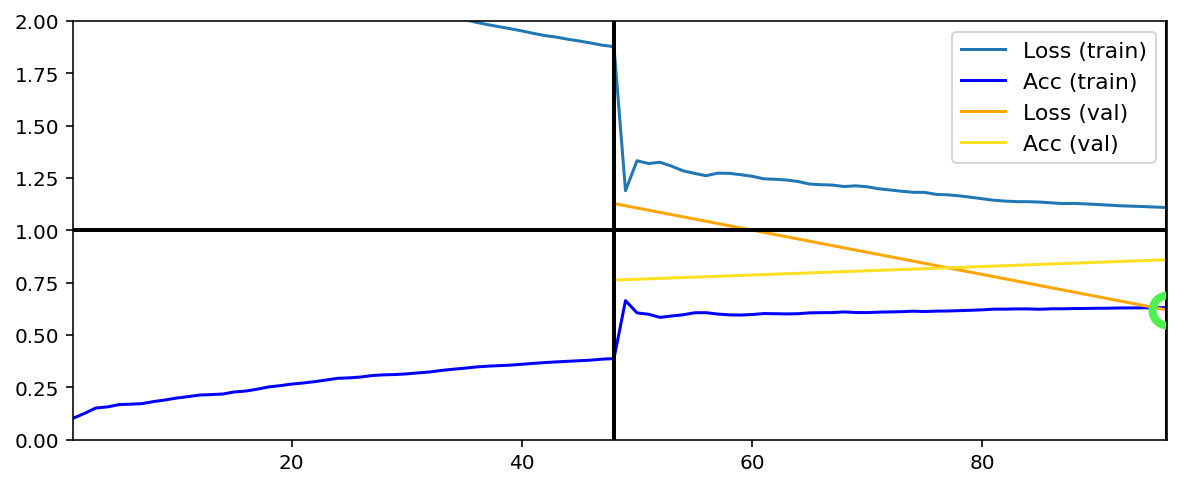


Data set_nums shuffled


_____________________
 EPOCH 3 -- COMPLETE 



Validating...
RANDOM SEEDS RESET (random: 5, numpy: 5, tf-graph: 5, tf-global: 5)
TrainGenerator state saved
Model report generated and saved
Best model saved to C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models\M32__model-Adam__min.459
RANDOM SEEDS RESET (random: 6, numpy: 6, tf-graph: 6, tf-global: 6)
TrainGenerator state saved
Model report generated and saved


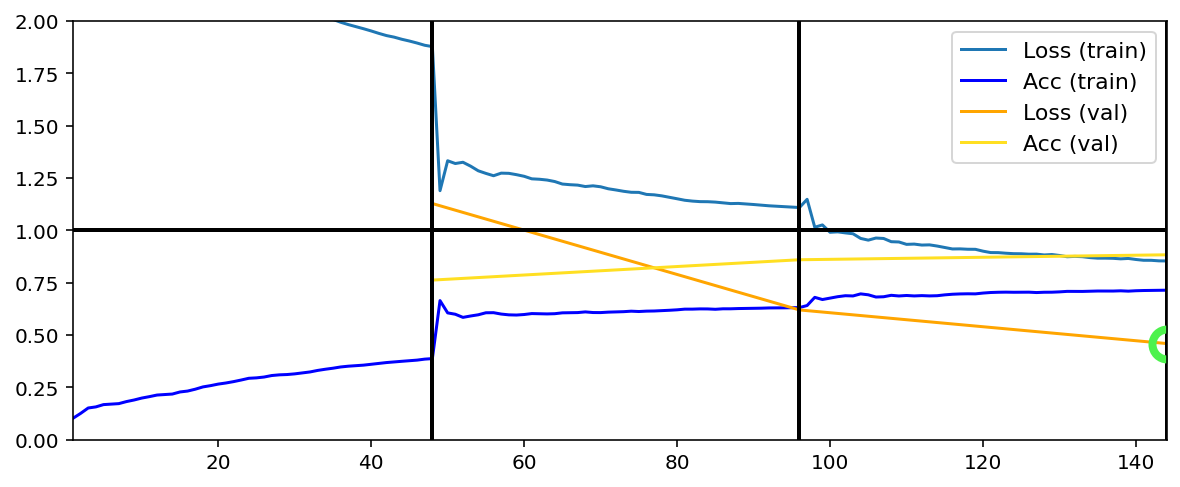

Training has concluded.


In [5]:
tg.train()

  - Text printed after epoch shows the values each of the four random seedwere set to, 
    which by default start at 0 and increment by 1.
  - Double incrementing is due to `tg.save()` being called within `.checkpoint()` *and* `._save_best_model()`.
  - Note that TensorFlow lacks a global random state for later recovery (though it's possible to achieve with
    meticulous model & graph definition).
  - Setting the seed at a point, and then loading the point and setting it again
    (which is what we'll do), however, works.

## Clear current session

In [6]:
tg.save()
# Retrieve last saved logfile to then load
loadpath = tg.get_last_log('state')
tg.destroy(confirm=True)
del tg, seed_setter  # seed_setter has internal reference to `tg`; destroy it

RANDOM SEEDS RESET (random: 7, numpy: 7, tf-graph: 7, tf-global: 7)
TrainGenerator state saved
>>>TrainGenerator DESTROYED


## Start new session, load savefile

In [7]:
C['traingen']['loadpath'] = loadpath
C['traingen']['callbacks'] = [RandomSeedSetter(freq=seed_freq)]
tg = init_session(C, make_classifier)

Discovered 48 files with matching format
Discovered dataset with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
TrainGenerator state loaded from C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\logs\M32__model-Adam__min999.000\_temp_model__state.h5
--Preloading excluded data based on datagen states ...
Preloading superbatch ... Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finishe

Last random seed loaded and set; same would apply if we loaded from an earlier epoch.